## Input data for Q1 and Q2
You should have received three csv files. Each csv-file represents the locations where a person was stationary for a certain amount of time. 
The csv-files contain the following fields:

- Latitude: The latitude of the detected GPS coordinates Longitude: The longitude of the detected GPS coordinates
- Timestamp: The start time of the stationary in the following format:
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
- Duration: The length of time the person was stationary (in milliseconds)
    
Questions 1 and 2 in this assignment are related to this data.

## Question 1: Data lookup
Create a method that generates a lookup table allowing us to effiently check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location (some noise is added to the longitude/latitude pairs). Data to be used are in the provided csv files.

In [1]:
#pip3 install cython
#pip3 install pyshp
#brew install swig
#pip3 install -U git+https://github.com/matplotlib/basemap.git

# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Exploratory Data Analysis person1

In [3]:
df1 = pd.read_csv("person1.csv",sep=';')
df1.head()

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms)
0,-49.326958,-72.89073,201312251147-0300,1186491
1,-49.326930,-72.89073,201312251213-0300,4393711
2,-49.316610,-72.89890,201312251358-0300,842939
3,-49.327160,-72.89072,201312251440-0300,211887
4,-49.326880,-72.89085,201312251631-0300,71166228


In [4]:
df1.isnull().sum()

latitude                     0
longitude                    0
start_time(YYYYMMddHHmmZ)    0
duration(ms)                 0
dtype: int64

In [5]:
df1.index.name = 'NO'
df1.columns = ['latitude', 'longitude','start_time','duration']
df1.head()

,latitude,longitude,start_time,duration
NO,,,,
0,-49.326958,-72.89073,201312251147-0300,1186491
1,-49.326930,-72.89073,201312251213-0300,4393711
2,-49.316610,-72.89890,201312251358-0300,842939
3,-49.327160,-72.89072,201312251440-0300,211887
4,-49.326880,-72.89085,201312251631-0300,71166228


In [6]:
df1['start_time'] = pd.to_datetime(df1['start_time'])

Timestamp: The start time of the stationary in the following format:
        
YYYY = year

MM = month of year

dd = day of month

HH=hourofday

mm = minute of hour

Z = timezone offset

create 3 new columns called Hour, Month, and Day of Month

In [7]:
df1['Hour'] = df1['start_time'].apply(lambda time: time.hour)
df1['Month'] = df1['start_time'].apply(lambda time: time.month)
df1['Day of Month'] = df1['start_time'].apply(lambda time: time.day)

In [8]:
# save to file
df1.columns = ['latitude', 'longitude','start_time','duration','Hour','Month','Day_Month']
df1.to_csv('dataset1.csv')
df1.head()

,latitude,longitude,start_time,duration,Hour,Month,Day_Month
NO,,,,,,,
0,-49.326958,-72.89073,2013-12-25 11:47:00-03:00,1186491,11,12,25
1,-49.326930,-72.89073,2013-12-25 12:13:00-03:00,4393711,12,12,25
2,-49.316610,-72.89890,2013-12-25 13:58:00-03:00,842939,13,12,25
3,-49.327160,-72.89072,2013-12-25 14:40:00-03:00,211887,14,12,25
4,-49.326880,-72.89085,2013-12-25 16:31:00-03:00,71166228,16,12,25


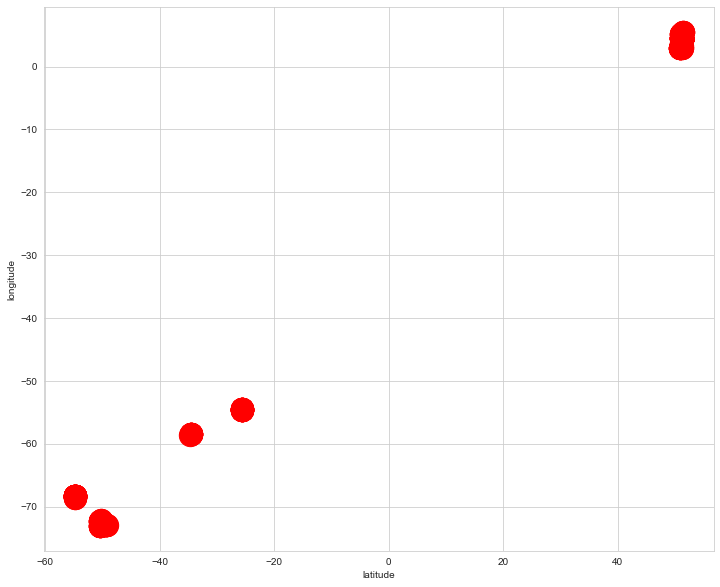

In [9]:
df1.plot.scatter(x='latitude',y='longitude',c='red',s=500,figsize=(12,10))

# Exploratory Data Analysis person2

In [10]:
df2 = pd.read_csv("person2.csv",sep=';')
df2.head()

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms)
0,51.057022,3.714476,201312250036+0100,19593588
1,51.056984,3.714681,201312250608+0100,30460679
2,51.038406,3.729655,201312251451+0100,964169
3,50.880190,4.251147,201312251514+0100,262475
4,50.861668,4.475020,201312251524+0100,64461


In [11]:
df2.isnull().sum()

latitude                     0
longitude                    0
start_time(YYYYMMddHHmmZ)    0
duration(ms)                 0
dtype: int64

In [12]:
df2.index.name = 'NO'
df2.columns = ['latitude', 'longitude','start_time','duration']
df2.head()

,latitude,longitude,start_time,duration
NO,,,,
0,51.057022,3.714476,201312250036+0100,19593588
1,51.056984,3.714681,201312250608+0100,30460679
2,51.038406,3.729655,201312251451+0100,964169
3,50.880190,4.251147,201312251514+0100,262475
4,50.861668,4.475020,201312251524+0100,64461


In [13]:
df2['start_time'] = pd.to_datetime(df2['start_time'])

In [14]:
df2['Hour'] = df2['start_time'].apply(lambda time: time.hour)
df2['Month'] = df2['start_time'].apply(lambda time: time.month)
df2['Day of Month'] = df2['start_time'].apply(lambda time: time.day)

In [15]:
# save to file
df2.columns = ['latitude', 'longitude','start_time','duration','Hour','Month','Day_Month']
df2.to_csv('dataset2.csv')
df2.head()

,latitude,longitude,start_time,duration,Hour,Month,Day_Month
NO,,,,,,,
0,51.057022,3.714476,2013-12-25 00:36:00+01:00,19593588,0,12,25
1,51.056984,3.714681,2013-12-25 06:08:00+01:00,30460679,6,12,25
2,51.038406,3.729655,2013-12-25 14:51:00+01:00,964169,14,12,25
3,50.880190,4.251147,2013-12-25 15:14:00+01:00,262475,15,12,25
4,50.861668,4.475020,2013-12-25 15:24:00+01:00,64461,15,12,25


/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


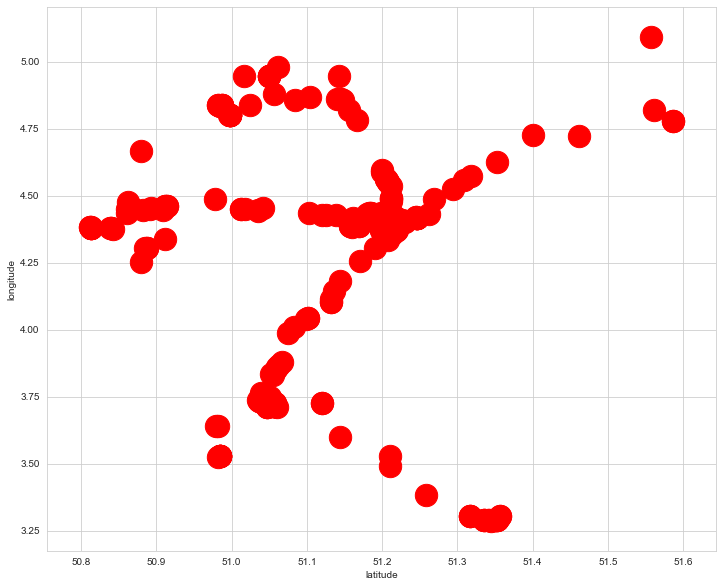

In [16]:
df2.plot.scatter(x='latitude',y='longitude',c='red',s=500,figsize=(12,10))

# Exploratory Data Analysis person3

In [17]:
df3 = pd.read_csv("person3.csv",sep=';')
df3.head()

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms)
0,51.216340,4.394143,201401061340+0100,9488434
1,51.205994,4.392227,201401061631+0100,430394
2,51.054200,4.447165,201401061643+0100,487049
3,50.906025,4.713024,201401061715+0100,60332
4,50.953205,4.798912,201401061721+0100,2395


In [18]:
df3.isnull().sum()

latitude                     0
longitude                    0
start_time(YYYYMMddHHmmZ)    0
duration(ms)                 0
dtype: int64

In [19]:
df3.index.name = 'NO'
df3.columns = ['latitude', 'longitude','start_time','duration']
df3.head()

,latitude,longitude,start_time,duration
NO,,,,
0,51.216340,4.394143,201401061340+0100,9488434
1,51.205994,4.392227,201401061631+0100,430394
2,51.054200,4.447165,201401061643+0100,487049
3,50.906025,4.713024,201401061715+0100,60332
4,50.953205,4.798912,201401061721+0100,2395


In [20]:
df3['start_time'] = pd.to_datetime(df3['start_time'])

In [21]:
df3['Hour'] = df3['start_time'].apply(lambda time: time.hour)
df3['Month'] = df3['start_time'].apply(lambda time: time.month)
df3['Day of Month'] = df3['start_time'].apply(lambda time: time.day)

In [22]:
# save to file
df3.columns = ['latitude', 'longitude','start_time','duration','Hour','Month','Day_Month']
df3.to_csv('dataset3.csv')
df3.head()

,latitude,longitude,start_time,duration,Hour,Month,Day_Month
NO,,,,,,,
0,51.216340,4.394143,2014-01-06 13:40:00+01:00,9488434,13,1,6
1,51.205994,4.392227,2014-01-06 16:31:00+01:00,430394,16,1,6
2,51.054200,4.447165,2014-01-06 16:43:00+01:00,487049,16,1,6
3,50.906025,4.713024,2014-01-06 17:15:00+01:00,60332,17,1,6
4,50.953205,4.798912,2014-01-06 17:21:00+01:00,2395,17,1,6


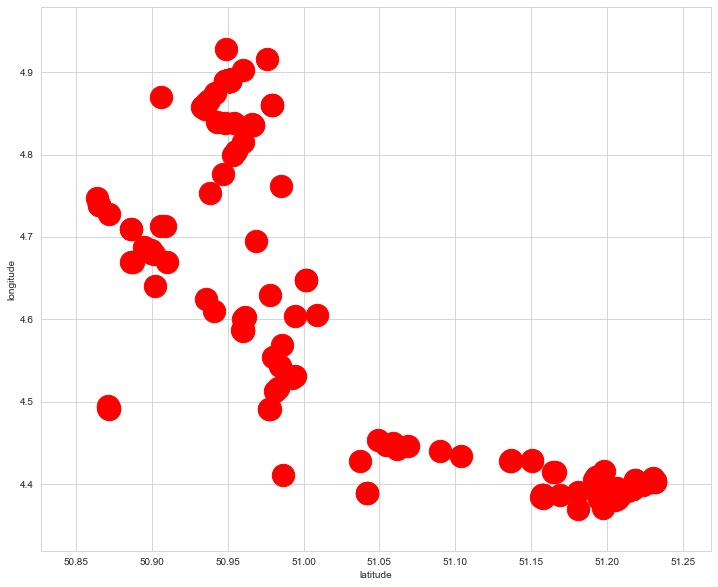

In [23]:
df3.plot.scatter(x='latitude',y='longitude',c='red',s=500,figsize=(12,10))

# Create database SQLite for all person 

In [24]:
import sqlite3  # import the sqlite to use it

conn = sqlite3.connect('person_db.db') # create a db using the connection method

c = conn.cursor()  # enables you to perform SQL commands


c.execute('''CREATE TABLE person1 (NO int,latitude float, longitude float,start_time string, duration int,Hour int,Month int,Day_Month int )''')  # create table 'person'

conn.commit() # save changes

conn.close()  #close the connection to the db

# Upload csv for person1 Table

In [25]:
import sqlite3 
import csv

my_db = 'person_db.db'

upload_file = 'dataset1.csv' 

SQL_statement = """ INSERT INTO person1 (NO,latitude, longitude, start_time, duration, Hour,Month, Day_Month) 
VALUES (:NO,:latitude, :longitude, :start_time, :duration, :Hour, :Month, :Day_Month) """


with open(upload_file, 'rt') as upload:
    reader = csv.reader(upload)

    with sqlite3.connect(my_db) as connect:
        c = connect.cursor()
        c.executemany(SQL_statement, reader)

# latitude, longitude for Top 10 duration in the table for person1

In [26]:
#select latitude, longitude order by duration in descending order
c.execute("SELECT NO,latitude, longitude,duration,Hour from person1 ORDER BY duration DESC Limit 10") 
for name in c:
    print("Order by DESC ", name)    
    print()   

Order by DESC  ('NO', 'latitude', 'longitude', 'duration', 'Hour')

Order by DESC  (248, 51.171640000000004, 4.34701, 129017407, 20)

Order by DESC  (204, 51.2163, 4.394278, 100448402, 7)

Order by DESC  (440, 51.171623, 4.3468328000000005, 87689939, 12)

Order by DESC  (178, 51.171479999999995, 4.3470054000000005, 82343763, 18)

Order by DESC  (221, 51.1716, 4.347042, 75560327, 16)

Order by DESC  (4, -49.326879999999996, -72.89085, 71166228, 16)

Order by DESC  (362, 51.21634, 4.3940945, 70732051, 11)

Order by DESC  (339, 51.171654, 4.347042, 65673722, 17)

Order by DESC  (164, -34.812263, -58.539413, 64697876, 13)



# Check whether or not a user has ever visited a location even if the new location is exactly the same as the visited location

In [27]:
c.execute("SELECT latitude, longitude,duration, count(*) FROM person1 WHERE latitude=51.171654 AND longitude=4.347042 GROUP BY latitude, longitude ")

for name in c:
    print("Visited exact location ", name)    
    print()

Visited exact location  (51.171654, 4.347042, 56932084, 2)



# Check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location

In [28]:

c.execute("SELECT latitude, longitude,duration, count(*) FROM person1 WHERE latitude LIKE '%51.2163%' AND longitude LIKE '%4.3941%'   GROUP BY latitude, longitude ")

for name in c:
    print("Visited similar location ", name)    
    print("")
    

Visited similar location  (51.2163, 4.394101, 367460, 1)

Visited similar location  (51.2163, 4.3941045, 27052010, 2)

Visited similar location  (51.2163, 4.394129799999999, 9041361, 1)

Visited similar location  (51.216305, 4.3941145, 13249968, 1)

Visited similar location  (51.216305, 4.39412, 9337876, 1)

Visited similar location  (51.216305, 4.394145, 14771434, 1)

Visited similar location  (51.21631, 4.3941045, 34530532, 1)

Visited similar location  (51.21631, 4.394106400000001, 31146117, 1)

Visited similar location  (51.21631, 4.394119, 1370590, 1)

Visited similar location  (51.216312, 4.3941016, 4557758, 1)

Visited similar location  (51.216312, 4.394107, 12984851, 1)

Visited similar location  (51.216316, 4.3941183, 19534662, 1)

Visited similar location  (51.21632, 4.3941007, 16353512, 1)

Visited similar location  (51.216324, 4.394109200000001, 1642737, 1)

Visited similar location  (51.216328000000004, 4.3941474000000005, 32268898, 1)

Visited similar location  (51.21633,

# Create table SQLite for person2

In [29]:
import sqlite3  # import the sqlite to use it

conn = sqlite3.connect('person_db.db') # create a db using the connection method

c = conn.cursor()  # enables you to perform SQL commands


c.execute('''CREATE TABLE person2 (NO int,latitude float, longitude float,start_time string, duration int,Hour int,Month int,Day_Month int )''')  # create table 'person'



conn.commit() # save changes

conn.close()  #close the connection to the db

# Upload csv for person2 Table

In [30]:
import sqlite3 
import csv

my_db = 'person_db.db'

upload_file = 'dataset2.csv' 

SQL_statement = """ INSERT INTO person2 (NO,latitude, longitude, start_time, duration, Hour,Month, Day_Month) 
VALUES (:NO,:latitude, :longitude, :start_time, :duration, :Hour, :Month, :Day_Month) """


with open(upload_file, 'rt') as upload:
    reader = csv.reader(upload)

    with sqlite3.connect(my_db) as connect:
        c = connect.cursor()
        c.executemany(SQL_statement, reader)

# latitude, longitude for Top 10 duration in the table for person2

In [31]:
#select latitude, longitude order by duration in descending order
c.execute("SELECT latitude, longitude,duration from person2 ORDER BY duration DESC Limit 10") 
for name in c:
    print("Order by DESC ", name)    
    print()   

Order by DESC  ('latitude', 'longitude', 'duration')

Order by DESC  (51.210907, 4.389543499999999, 163174115)

Order by DESC  (51.214275, 4.411574, 83181857)

Order by DESC  (51.221703000000005, 4.4005775, 75551144)

Order by DESC  (51.214245, 4.411580000000001, 69289220)

Order by DESC  (51.214237, 4.411529499999999, 67538447)

Order by DESC  (51.21423, 4.4115696, 66187557)

Order by DESC  (51.214259999999996, 4.4115624, 65108780)

Order by DESC  (51.214333, 4.411615, 62957540)

Order by DESC  (51.214268, 4.411565, 61154797)



# Check whether or not a user has ever visited a location even if the new location is exactly the same as the visited location

In [32]:
c.execute("SELECT latitude, longitude,duration, count(*) FROM person2 WHERE latitude=51.214333 AND longitude=4.411615 GROUP BY latitude, longitude ")

for name in c:
    print("Visited exact location ", name)    
    print()

Visited exact location  (51.214333, 4.411615, 62957540, 1)



# Check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location

In [33]:
c.execute("SELECT latitude, longitude,duration, count(*) FROM person2 WHERE latitude LIKE '%51.2143%' AND longitude LIKE '%4.411%'  GROUP BY latitude, longitude ")

for name in c:
    print("Visited similar location ", name)    
    print("")
    

Visited similar location  (51.2143, 4.4115925, 55707283, 1)

Visited similar location  (51.214302, 4.4115267, 7716381, 1)

Visited similar location  (51.214302, 4.4115567, 60938428, 1)

Visited similar location  (51.214302, 4.411574400000001, 9994717, 1)

Visited similar location  (51.214302, 4.4115853, 13543637, 1)

Visited similar location  (51.214306, 4.411568, 54034894, 1)

Visited similar location  (51.214306, 4.4115763, 15675335, 1)

Visited similar location  (51.21431, 4.411529499999999, 16137526, 1)

Visited similar location  (51.21431, 4.411553, 48272635, 1)

Visited similar location  (51.21431, 4.4115887, 3843761, 1)

Visited similar location  (51.214314, 4.4115567, 51365330, 1)

Visited similar location  (51.214333, 4.411615, 62957540, 1)

Visited similar location  (51.21436, 4.411226, 52019895, 1)



# Create table SQLite for person3

In [34]:
import sqlite3  # import the sqlite to use it

conn = sqlite3.connect('person_db.db') # create a db using the connection method

c = conn.cursor()  # enables you to perform SQL commands


c.execute('''CREATE TABLE person3 (NO int,latitude float, longitude float,start_time string, duration int,Hour int,Month int,Day_Month int)''')  # create table 'person'

conn.commit() # save changes

conn.close()  #close the connection to the db

# Upload csv for person3 Table

In [35]:
import sqlite3 
import csv

my_db = 'person_db.db'

upload_file = 'dataset3.csv' 

SQL_statement = """ INSERT INTO person3 (NO,latitude, longitude, start_time, duration, Hour,Month, Day_Month) 
VALUES (:NO,:latitude, :longitude, :start_time, :duration, :Hour, :Month, :Day_Month) """


with open(upload_file, 'rt') as upload:
    reader = csv.reader(upload)

    with sqlite3.connect(my_db) as connect:
        c = connect.cursor()
        c.executemany(SQL_statement, reader)

# latitude, longitude for Top 10 duration in the table for person3

In [36]:
#select latitude, longitude order by duration in descending order
c.execute("SELECT latitude, longitude,duration from person3 ORDER BY duration DESC Limit 10") 

for name in c:
    print("Order by DESC ", name)    
    print()   

Order by DESC  ('latitude', 'longitude', 'duration')

Order by DESC  (50.951176000000004, 4.8898589999999995, 66377678)

Order by DESC  (50.9512, 4.8899307, 61764029)

Order by DESC  (50.951229999999995, 4.8899617, 60899587)

Order by DESC  (50.951209999999996, 4.8898864, 59857178)

Order by DESC  (50.95122, 4.889975499999999, 56168362)

Order by DESC  (50.951153000000005, 4.889762999999999, 54692262)

Order by DESC  (50.951176000000004, 4.889851599999999, 51989782)

Order by DESC  (50.951237, 4.8899593, 51232152)

Order by DESC  (50.95122, 4.8899875, 49417677)



# Check whether or not a user has ever visited a location even if the new location is exactly the same as the visited location¶

In [37]:
c.execute("SELECT latitude, longitude,duration, count(*) FROM person3 WHERE latitude=50.9512 AND longitude=4.8899307 GROUP BY latitude, longitude ")

for name in c:
    print("Visited exact location ", name)    
    print()

Visited exact location  (50.9512, 4.8899307, 61764029, 1)



# Check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location

In [38]:
c.execute("SELECT latitude, longitude,duration, count(*) FROM person3 WHERE latitude LIKE '%50.9511%' AND longitude LIKE '%4.889%'  GROUP BY latitude, longitude ")

for name in c:
    print("Visited similar location ", name)    
    print("")

Visited similar location  (50.951138, 4.889746700000001, 2032197, 1)

Visited similar location  (50.951138, 4.889749500000001, 4908440, 1)

Visited similar location  (50.951153000000005, 4.889762999999999, 54692262, 1)

Visited similar location  (50.951157, 4.8897505, 213955, 1)

Visited similar location  (50.951157, 4.8897543, 64847, 1)

Visited similar location  (50.951164, 4.889774, 195994, 1)

Visited similar location  (50.951168, 4.8897758, 199996, 1)

Visited similar location  (50.951168, 4.8897767, 213967, 3)

Visited similar location  (50.951168, 4.889778, 6807623, 1)

Visited similar location  (50.951168, 4.88978, 8168098, 2)

Visited similar location  (50.95117, 4.889839, 37914154, 1)

Visited similar location  (50.951176000000004, 4.8897867, 482123, 3)

Visited similar location  (50.951176000000004, 4.889792, 2614471, 1)

Visited similar location  (50.951176000000004, 4.889803400000001, 10068992, 1)

Visited similar location  (50.951176000000004, 4.889851599999999, 51989782,

# The complexity (Big O notation)

O(N)—Linear Time:
    
Linear Time Complexity describes an algorithm or program who’s complexity will grow in direct proportion to the size of the input data

Here the look-up time is directly related to the size of our input because we went through each item within the statement.

End of Q-1

# Question 2: Home and work detection

    
The goal of this question, is to design and implement an algorithm that allows us to distinguish the likely home locations of a user from his likely work locations.

Note that a person might have multiple home and work locations, or might not have a work location at all. Also note that the data might be noise, incorrect and/or incomplete.

Discuss your choice of algorithms, rules, methods, distance measures, etc.

Data to be used are in the provided csv files

 To distinguish the likely home locations of a user from his likely work locations
    
    We can consider HH between 8 to 18 as office location
    
    We can consider HH Not between 8 to 18 as Home location

# Home and work detection Person1

In [39]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person1 WHERE Hour BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Home location ", name)    
    print()

Might be Home location  (51.173508, 4.350842500000001, 8, 160179, 26)

Might be Home location  (-50.334236, -72.25478000000001, 9, 957246, 15)

Might be Home location  (-50.334595, -72.253525, 10, 2120155, 24)

Might be Home location  (-49.326958000000005, -72.89073, 11, 1186491, 41)

Might be Home location  (-49.32693, -72.89073, 12, 4393711, 30)

Might be Home location  (-49.31661, -72.8989, 13, 842939, 36)

Might be Home location  (-49.32716, -72.89072, 14, 211887, 25)

Might be Home location  (-49.33384, -72.88286, 15, 1469429, 20)

Might be Home location  (-49.326879999999996, -72.89085, 16, 71166228, 54)

Might be Home location  (-50.472282, -73.032814, 17, 841956, 61)

Might be Home location  (-50.339264, -72.263306, 18, 331102, 38)



In [40]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person1 WHERE Hour NOT BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Office location ", name)    
    print()

Might be Office location  (-50.334274, -72.25474, 0, 1283422, 7)

Might be Office location  (-50.33426, -72.25475, 1, 2448768, 10)

Might be Office location  (-50.334404, -72.25321, 2, 5662363, 5)

Might be Office location  (-54.808926, -68.31631999999999, 3, 3894414, 1)

Might be Office location  (-50.334835, -72.25361, 4, 22251313, 4)

Might be Office location  (-54.80891999999999, -68.316284, 5, 4202262, 2)

Might be Office location  (-54.808930000000004, -68.316315, 6, 10655827, 12)

Might be Office location  (51.213406, 4.3911690000000005, 7, 30647, 42)

Might be Office location  (-50.334602000000004, -72.2535, 19, 3795662, 26)

Might be Office location  (-50.33566, -72.256226, 20, 262267, 19)

Might be Office location  (-50.337856, -72.26328000000001, 21, 62026, 21)

Might be Office location  (-50.338104, -72.26388, 22, 1515711, 19)

Might be Office location  (-50.338013000000004, -72.25836, 23, 202900, 11)

Might be Office location  ('latitude', 'longitude', 'Hour', 'duration', 

# Home and work detection Person2

In [41]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person2 WHERE Hour BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Home location ", name)    
    print()

Might be Home location  (51.215893, 4.410440400000001, 8, 249, 73)

Might be Home location  (51.216366, 4.394152, 9, 20410836, 35)

Might be Home location  (51.166862, 4.7824387999999995, 10, 63484, 29)

Might be Home location  (51.214290000000005, 4.4115834000000005, 11, 2856228, 39)

Might be Home location  (51.214115, 4.400686299999999, 12, 1667, 35)

Might be Home location  (51.214302, 4.4115853, 13, 13543637, 37)

Might be Home location  (51.038406, 3.7296553, 14, 964169, 33)

Might be Home location  (50.88019, 4.2511472999999995, 15, 262475, 53)

Might be Home location  (51.21431, 4.4115887, 16, 3843761, 43)

Might be Home location  (51.217503, 4.410906, 17, 2334660, 88)

Might be Home location  (51.214306, 4.411568, 18, 54034894, 78)



In [42]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person2 WHERE Hour NOT BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Office location ", name)    
    print()

Might be Office location  (51.057021999999996, 3.7144760000000003, 0, 19593588, 11)

Might be Office location  (51.041393, 3.7296294999999997, 1, 7992054, 12)

Might be Office location  (51.056995, 3.7146337, 2, 41255828, 4)

Might be Office location  (51.214306, 4.4115763, 3, 15675335, 9)

Might be Office location  (51.214264, 4.411594999999999, 5, 25859587, 1)

Might be Office location  (51.056984, 3.7146811, 6, 30460679, 7)

Might be Office location  (51.214252, 4.4115652999999995, 7, 18745907, 24)

Might be Office location  (50.997192, 4.802296, 19, 18114776, 55)

Might be Office location  (51.119576, 3.7280097000000003, 20, 2092985, 22)

Might be Office location  (51.057068, 3.7144496, 21, 122115, 30)

Might be Office location  (51.216244, 4.414080599999999, 22, 273, 31)

Might be Office location  (51.214268, 4.411592, 23, 32847383, 14)

Might be Office location  ('latitude', 'longitude', 'Hour', 'duration', 1)



# Home and work detection Person3

In [43]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person3 WHERE Hour BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Home location ", name)    
    print()

Might be Home location  (51.216343, 4.3941550000000005, 8, 29794938, 20)

Might be Home location  (50.95125, 4.8899946, 9, 1224431, 7)

Might be Home location  (50.979164000000004, 4.8602414000000005, 10, 3551214, 16)

Might be Home location  (50.951225, 4.890057, 11, 1146737, 30)

Might be Home location  (50.947964, 4.889203, 12, 859101, 19)

Might be Home location  (51.21634, 4.3941426, 13, 9488434, 14)

Might be Home location  (50.887432000000004, 4.669846499999999, 14, 229888, 10)

Might be Home location  (51.230957000000004, 4.403870599999999, 15, 17587874, 8)

Might be Home location  (51.205994, 4.3922267, 16, 430394, 23)

Might be Home location  (50.906025, 4.7130237, 17, 60332, 40)

Might be Home location  (50.947964, 4.889203, 18, 38753348, 33)



In [44]:
c.execute("SELECT latitude, longitude,Hour,duration,count(*) FROM person3 WHERE Hour NOT BETWEEN 8 and 18 GROUP BY Hour ")

for name in c:
    print("Might be Office location ", name)    
    print()

Might be Office location  (50.951195, 4.889941, 0, 60025, 2)

Might be Office location  (50.951168, 4.8897767, 1, 213967, 6)

Might be Office location  (50.951263, 4.890061, 2, 14039931, 10)

Might be Office location  (50.951168, 4.88978, 3, 12342828, 4)

Might be Office location  (50.951138, 4.889749500000001, 4, 4908440, 3)

Might be Office location  (50.951263, 4.890055, 5, 1182751, 7)

Might be Office location  (50.951183, 4.889838, 6, 575036, 17)

Might be Office location  (51.216316, 4.394121599999999, 7, 29532006, 29)

Might be Office location  (50.951214, 4.8899446, 19, 39794170, 26)

Might be Office location  (51.230957000000004, 4.403870599999999, 20, 1022298, 23)

Might be Office location  (51.230957000000004, 4.403870599999999, 21, 301085, 5)

Might be Office location  (50.95118, 4.889869, 22, 28572904, 3)

Might be Office location  (50.951176000000004, 4.889803400000001, 23, 10068992, 2)

Might be Office location  ('latitude', 'longitude', 'Hour', 'duration', 1)



# Mapping Points-Area of interest person1

We can use Map visualization like below. There sholud be a region name column in the dataset.

In [45]:
#conda install folium -c conda-forge

In [46]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np
import folium

In [47]:
locations = df1[['latitude', 'longitude']]
locationlist = locations.values.tolist()
l=len(locationlist)
print(l)

549


Might be Home location  (51.216343, 4.3941550000000005)

In [48]:
map = folium.Map(location=[51.173508, 4.350842500000001], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df1['Hour'][point]).add_to(map)
map

In [49]:
map.save('plot_data1.html')

In [58]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data1.html width=700 height=450></iframe>')

# Mapping Points-Area of interest person2

In [50]:
locations = df2[['latitude', 'longitude']]
locationlist = locations.values.tolist()
l=len(locationlist)
print(l)

763


Might be Home location  (51.215893, 4.410440400000001)


In [51]:
map = folium.Map(location=[51.215893, 4.410440400000001], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df2['Hour'][point]).add_to(map)
map

In [52]:
map.save('plot_data2.html')

In [57]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data2.html width=700 height=450></iframe>')

# Mapping Points-Area of interest person3

In [53]:
locations = df3[['latitude', 'longitude']]
locationlist = locations.values.tolist()
l=len(locationlist)
print(l)

357


Might be Home location  (50.947964, 4.889203)

In [54]:
map = folium.Map(location=[50.947964, 4.889203], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df3['Hour'][point]).add_to(map)
map

In [55]:
map.save('plot_data3.html')

In [56]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data3.html width=700 height=450></iframe>')

/Users/mosthusnejahan/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


End of Q-2

## Question 3: Design a data refresh system
Have a look at the Foursquare API, more specifically, the Venues search route at
https://developer.foursquare.com/docs/venues/search
Design a system that can receive a location fix (as a [latitude, longitude, accuracy] mobile GPS fix) and run
an algorithm to find the actual venue a user has visited using Foursquare as a venues-database. The design
should minimize the use of calls to the Foursquare API and include a way to refresh Foursquare results as
data retrieved from Foursquare can only be kept for a maximum of 30 days.

Keep in mind the definition of accuracy for a mobile GPS fix. Accuracy is represented in meter and means
that there is a 68% probability that a user is within a radius of that amount of meter around the provided
[latitude, longitude] coordinates. See Android docs:
https://developer.android.com/reference/android/location/Location.html#getAccuracy()

Additionally, visiting a place is highly unlikely to yield the exact same locations (again as [latitude, longitude]
pairs) on consecutive visits. Small variations are to be expected.

The goal of this assignment is to explain the software/systems design for this component. Please
provide one or more diagrams and accompanying text.
Note: The algorithm to map a location to a venue from a list of candidates can be considered as given.

For bonus points: provide your ideas on what this algorithm could look like.

# Algorithm

We can use K-means algorithom but the Douglas-Peucker give us a better reduced data set than the k-means clustering algorithm, and it can comparable to result of the DBSCAN clustering algorithm.

# Ramer–Douglas–Peucker algorithm:

The purpose of the algorithm is, given a curve composed of line segments (which is also called a Polyline in some contexts), to find a similar curve with fewer points. The algorithm defines 'dissimilar' based on the maximum distance between the original curve and the simplified curve


The starting curve is an ordered set of points or lines and the distance dimension ε > 0.

The algorithm recursively divides the line. Initially it is given all the points between the first and last point. It automatically marks the first and last point to be kept. It then finds the point that is farthest from the line segment with the first and last points as end points; this point is obviously farthest on the curve from the approximating line segment between the end points. If the point is closer than ε to the line segment, then any points not currently marked to be kept can be discarded without the simplified curve being worse than ε.

If the point farthest from the line segment is greater than ε from the approximation then that point must be kept. The algorithm recursively calls itself with the first point and the farthest point and then with the farthest point and the last point, which includes the farthest point being marked as kept.

When the recursion is completed a new output curve can be generated consisting of all and only those points that have been marked as kept.

# Another algorithom is Kruskal’s Minimum Spanning Tree Algorithm

Given a connected and undirected graph, a spanning tree of that graph is a subgraph that is a tree and connects all the vertices together. A single graph can have many different spanning trees. A minimum spanning tree (MST) or minimum weight spanning tree for a weighted, connected and undirected graph is a spanning tree with weight less than or equal to the weight of every other spanning tree. The weight of a spanning tree is the sum of weights given to each edge of the spanning tree.

We can find MST using Kruskal’s algorithm:

1. Sort all the edges in non-decreasing order of their weight.

2. Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far. If cycle is not formed, include this edge. Else, discard it.

3. Repeat step#2 until there are (V-1) edges in the spanning tree.

End of assignment